In [22]:
#Class 0 (Normal State): The email is Not Spam (Ham).
#Class 1 (Abnormal State): The email is Spam.
#The machine learning models (KNN and SVM) learn the patterns of word counts (features) associated with each class (Spam or Not Spam)
#to make future predictions.

In [24]:
import pandas as pd
import numpy as np # Needed for array handling
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split#training and testing
from sklearn.neighbors import KNeighborsClassifier#Imports the specific class for building the K-Nearest Neighbors (KNN) model.
from sklearn.svm import SVC# class for building the Support Vector Classification (SVC) model
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    PrecisionRecallDisplay,
    RocCurveDisplay,
)  #model performance (

In [26]:
plt.style.use('ggplot') #Sets a clean, standard visualization theme for all subsequent plots,

In [28]:
try:
    df = pd.read_csv('emails.csv')
    print("--- Data Loading Complete ---")
except FileNotFoundError:
    print("Error: 'emails (1).csv' not found. Please ensure the file is in the correct directory.")
    exit()

--- Data Loading Complete ---


In [30]:
# Display the first few rows (head)
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [44]:
# Check for missing values (if any) and handle them
df.isnull().sum()
df.dropna(how='any', inplace=True)

In [46]:
# 2. FEATURE AND TARGET SEPARATION
# X (Features): All columns except the last one (which is 'Prediction')
X = df.iloc[:, :-1].values

# y (Target):Defines the Target Vector (y). It selects all rows (:) and only the last column (-1), which contains the classification labels (0 for Not Spam, 1 for Spam).
y = df.iloc[:, -1].values

In [58]:
# 3. DATA SPLITTING
# Split the data into 75% for training and 25% for testing (as per test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=10
)
print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

Training set size: 3879 samples
Testing set size: 1293 samples


In [76]:
#The performance report Function
 #A helper function to train the classifier, generate predictions, and show all key metrics and plots.
def report(classifier, name):
    """Trains the classifier, makes predictions, and displays performance metrics."""
    print(f"\n==================== {name} REPORT ====================")
# Make predictions on the test set
    y_pred = classifier.predict(X_test)
    # 1. Performance Scores
    print(f"Accuracy:        {accuracy_score(y_test, y_pred):.4f}") #percentage of all emails (Spam and Not Spam) that the model classified correctly.
    print(f"Precision Score: {precision_score(y_test, y_pred):.4f}")#model correctness for positive predictions.
    print(f"Recall Score:    {recall_score(y_test, y_pred):.4f}")#Out of all the emails that were actually SPAM, what percentage did the model correctly identify?
    # 2. Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam (0)', 'Spam (1)'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    # plt.show() # Plotting command needs to be handled by the environment
     # 3. Precision-Recall Curve
    PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test, name=name).plot()
    plt.title(f'{name} Precision-Recall Curve')
    # plt.show()
#This curve is especially useful in imbalanced datasets (like spam/not-spam) as it shows the trade-off between Precision and Recall at various decision thresholds.
     # 4. ROC Curve (Receiver Operating Characteristic)
    RocCurveDisplay.from_estimator(classifier, X_test, y_test, name=name).plot()
    plt.title(f'{name} ROC Curve')
    plt.show()


--- Training K-Nearest Neighbors ---

==================== K-Nearest Neighbors (K=10) REPORT ====================
Accuracy:        0.8747
Precision Score: 0.7613
Recall Score:    0.8189


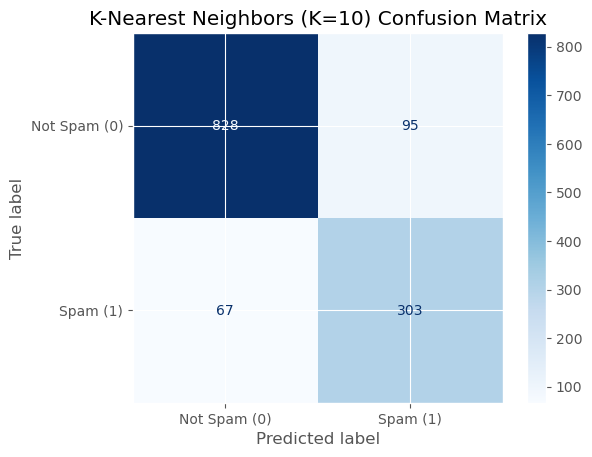

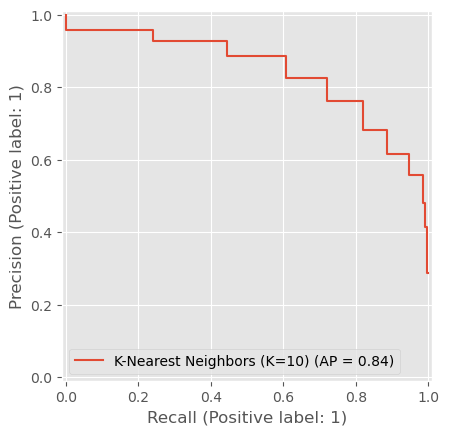

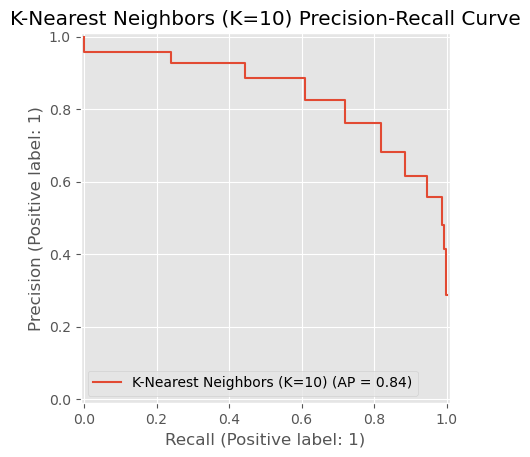

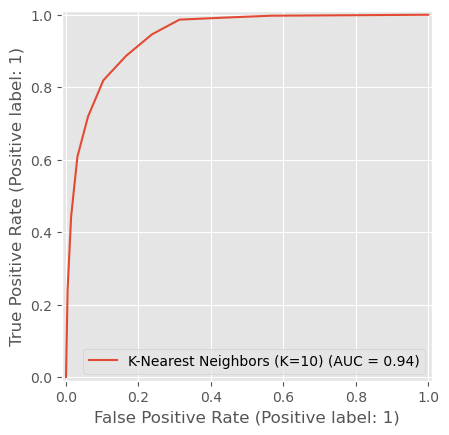

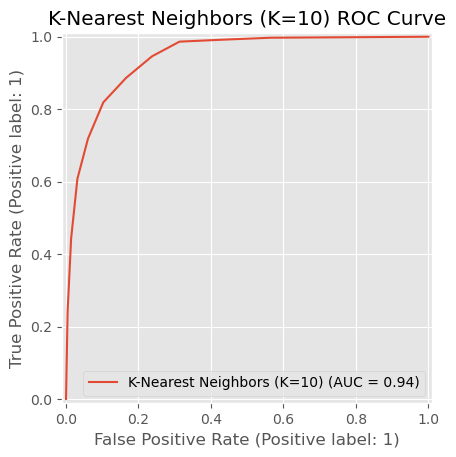

In [88]:
# 5. K-NEAREST NEIGHBORS (KNN) CLASSIFICATION
print("\n--- Training K-Nearest Neighbors ---")
kNN = KNeighborsClassifier(n_neighbors=10) # Set K=10 neighbors model will consider the 10 closest emails to classify a new one.
kNN.fit(X_train, y_train) # Train the model
report(kNN, "K-Nearest Neighbors (K=10)") # Generate and show report, display its scores and plots.

#output: 87.47 test emails were correctly classified the KNN model.
#76.13% of the emails that KNN predicted as Spam were actually Spam
#81.89% of all actual Spam emails in the test set were successfully identified by KNN.
#KNN ROC Curve: Plots the True Positive Rate vs. the False Positive Rate, with the Area Under the Curve (AUC) indicating the model's overall discrimination power.


--- Training Support Vector Machine ---

==================== Support Vector Machine (RBF Kernel) REPORT ====================
Accuracy:        0.9072
Precision Score: 0.9006
Recall Score:    0.7595


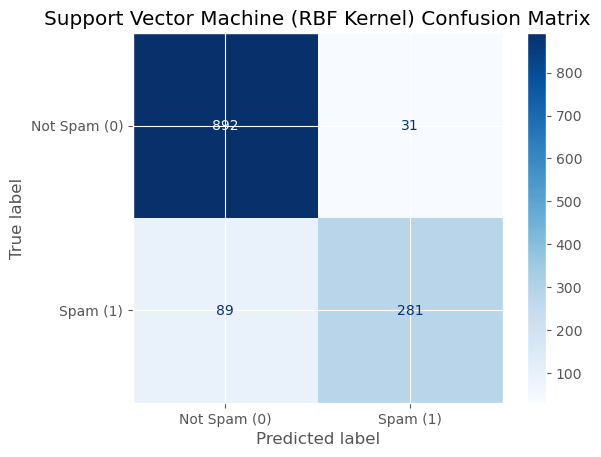

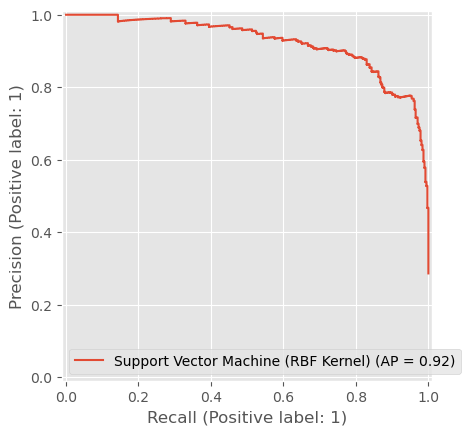

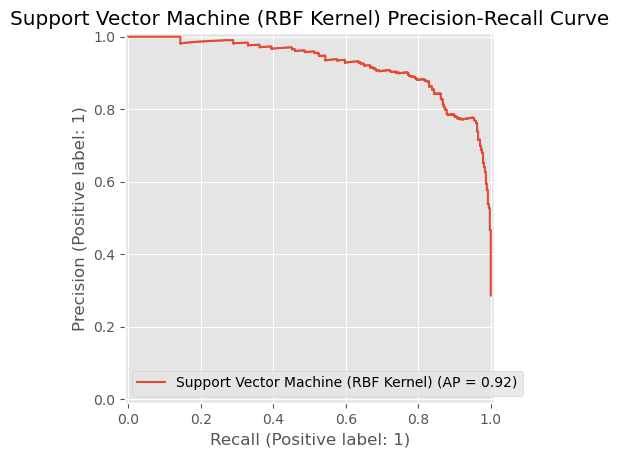

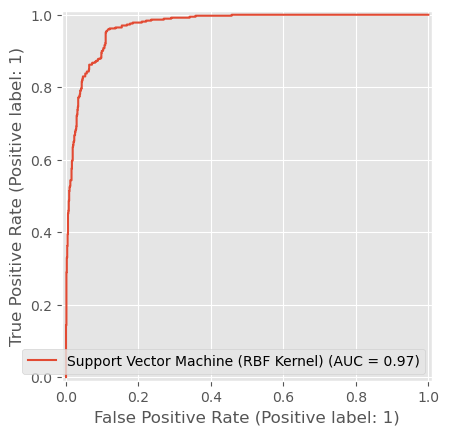

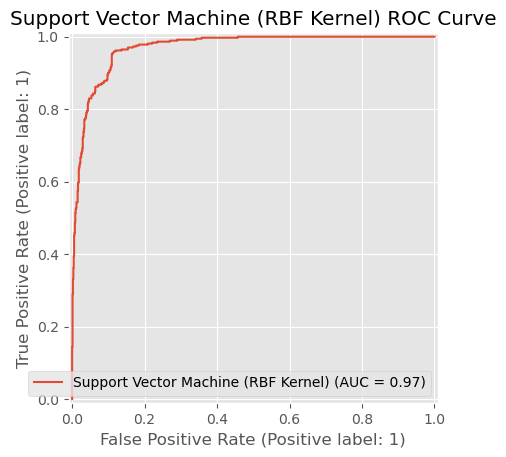

In [80]:
# 6. SUPPORT VECTOR MACHINE (SVM) CLASSIFICATION
print("\n--- Training Support Vector Machine ---")
# Using the default RBF kernel for non-linear separation
svm = SVC(kernel='rbf', gamma='auto', random_state=10)
svm.fit(X_train, y_train) # Train the model
report(svm, "Support Vector Machine (RBF Kernel)") # Generate and show report

In [81]:
# To display all generated plots at once (common practice in scripts):
plt.show()

In [82]:

print("\n--- Model Training and Evaluation Complete ---")


--- Model Training and Evaluation Complete ---
